<a href="https://colab.research.google.com/github/iasmimsilveira/Estudos_dados/blob/main/AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AT

1 - Escolher o dataset

2 - Escolher 2 proc de aprendizado

3 - Contruir os modelos (treinamento/validação/teste)

4 - Comparar os resultados -> exibir resultadoa

5 - Validação cruzada

6 - Ajustar os parâmetros

7 - Comparar novamente -> exibir resultados


# **`Heart Disease Dataset`**

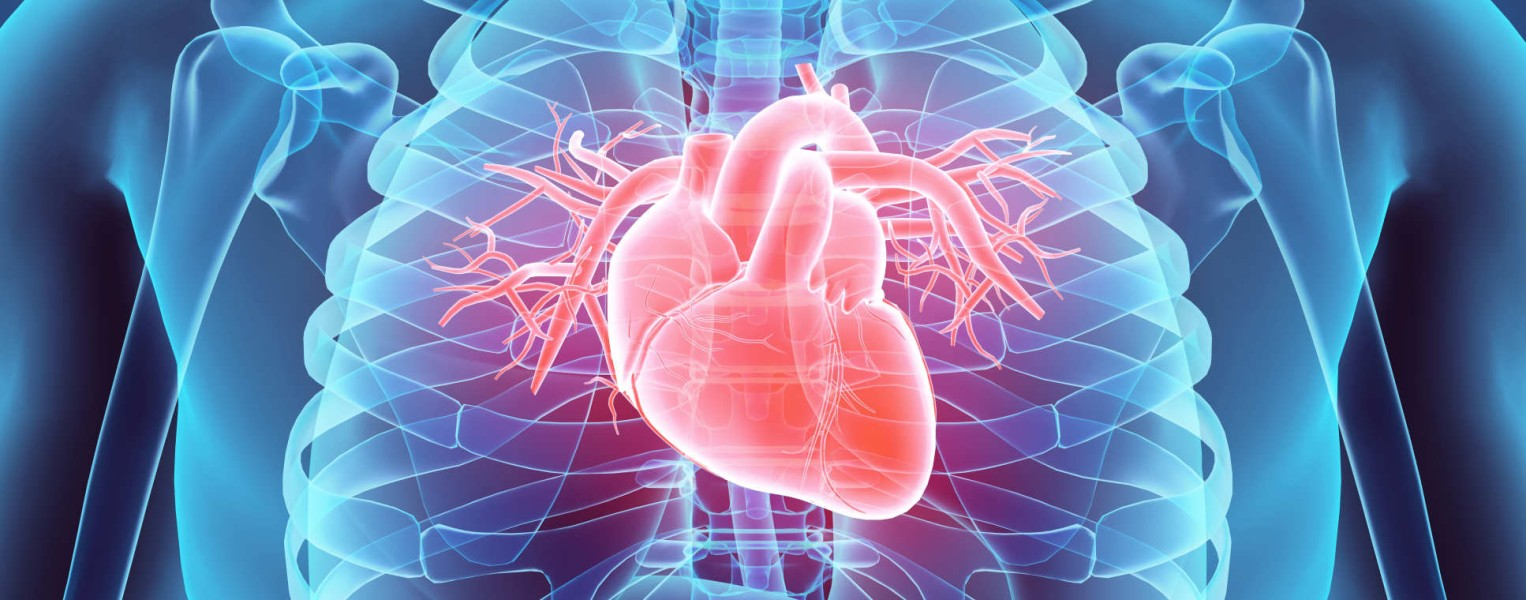

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Processos de Aprendizado

Regressão Logística

Random Forest.


---


 A Regressão Logística é um algoritmo de aprendizado supervisionado usado principalmente para problemas de classificação binária.
 Neste caso, quero prever a presença ou ausência de uma condição cardíaca (target), que é um problema de classificação binária (0 ou 1).

 Já o Random Forest é um algoritmo de aprendizado que utiliza múltiplas árvores de decisão para fazer previsões. Sendo adequado para uma ampla gama de problemas, incluindo classificação.

# **Modelos (Treinamento/Validação/Teste)**

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<ipython-input-27-822fdac5d285>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=True)


<Axes: xlabel='age', ylabel='Density'>

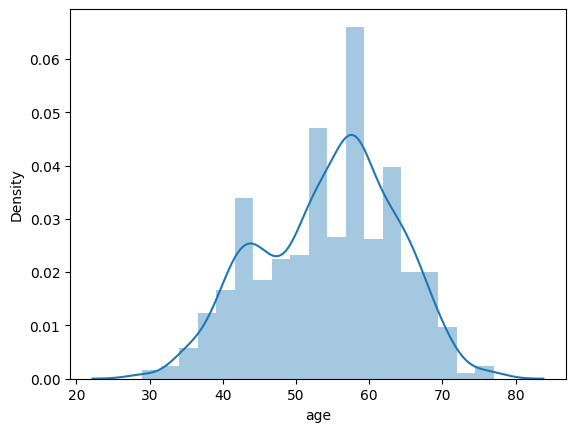

In [ ]:
import seaborn as sns
sns.distplot(df['age'], kde=True)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Comparar os Resultados -> Exibir Resultados**

In [ ]:
pip install tabulate


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Treinamento dos modelos
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# DataFrames com os resultados
log_reg_df = pd.DataFrame(log_reg_report).transpose()
log_reg_df['accuracy'] = log_reg_accuracy

rf_df = pd.DataFrame(rf_report).transpose()
rf_df['accuracy'] = rf_accuracy

# Adicionar uma coluna de modelo
log_reg_df['model'] = 'Logistic Regression'
rf_df['model'] = 'Random Forest'

# Concatenação dos resultados
results_df = pd.concat([log_reg_df, rf_df])

results_df = results_df.reset_index().rename(columns={'index': 'metric'})
results_df = results_df[['model', 'metric', 'precision', 'recall', 'f1-score', 'support', 'accuracy']]
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        model        |    metric    |     precision      |       recall       |      f1-score      |      support       |      accuracy      |
+---------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Logistic Regression |      0       | 0.8488372093023255 | 0.7156862745098039 | 0.7765957446808511 |       102.0        | 0.7951219512195122 |
| Logistic Regression |      1       | 0.7563025210084033 | 0.8737864077669902 | 0.8108108108108107 |       103.0        | 0.7951219512195122 |
| Logistic Regression |   accuracy   | 0.7951219512195122 | 0.7951219512195122 | 0.7951219512195122 | 0.7951219512195122 | 0.7951219512195122 |
| Logistic Regression |  macro avg   | 0.8025698651553644 | 0.7947363411383971 | 0.7937032777458309 |       205.0        | 0.79512195121

# **Validação Cruzada**

In [ ]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para Regressão Logística
cv_log_reg = cross_val_score(log_reg, X, y, cv=5)
print("Validação Cruzada Regressão Logística:", cv_log_reg)
print("Média da Validação Cruzada Regressão Logística:", cv_log_reg.mean())

# Validação cruzada para Random Forest
cv_rf = cross_val_score(rf_clf, X, y, cv=5)
print("Validação Cruzada Random Forest:", cv_rf)
print("Média da Validação Cruzada Random Forest:", cv_rf.mean())


Validação Cruzada Regressão Logística: [0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]
Média da Validação Cruzada Regressão Logística: 0.8497560975609757
Validação Cruzada Random Forest: [1.         1.         1.         1.         0.98536585]
Média da Validação Cruzada Random Forest: 0.9970731707317073


# **Ajustar os Parâmetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Ajuste de parâmetros para Regressão Logística
param_grid_log_reg = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log_reg, cv=5)
grid_log_reg.fit(X_train, y_train)
print("Melhores Parâmetros Regressão Logística:", grid_log_reg.best_params_)
log_reg_best = grid_log_reg.best_estimator_

# Ajuste de parâmetros para Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Melhores Parâmetros Random Forest:", grid_rf.best_params_)
rf_best = grid_rf.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Melhores Parâmetros Regressão Logística: {'C': 1, 'solver': 'liblinear'}
Melhores Parâmetros Random Forest: {'max_depth': None, 'n_estimators': 100}


In [ ]:
# Treinamento e avaliação com os melhores parâmetros

# Regressão Logística
log_reg_best.fit(X_train, y_train)
y_pred_log_reg_best = log_reg_best.predict(X_test)
log_reg_best_accuracy = accuracy_score(y_test, y_pred_log_reg_best)
print("Regressão Logística Ajustada Accuracy:", log_reg_best_accuracy)
print(classification_report(y_test, y_pred_log_reg_best))

# Random Forest
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)
rf_best_accuracy = accuracy_score(y_test, y_pred_rf_best)
print("Random Forest Ajustada Accuracy:", rf_best_accuracy)
print(classification_report(y_test, y_pred_rf_best))


Regressão Logística Ajustada Accuracy: 0.7853658536585366
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205

Random Forest Ajustada Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Logística ajustada:**

Accuracy = 0.7853658536585366

Uma acurácia de 0.7854 significa que o modelo de regressão logística prevê corretamente 78.54% dos casos.

No entanto, há uma diferença no desempenho entre as classes. Ele é melhor em prever a classe 1 (recall de 0.87) do que a classe 0 (recall de 0.70). A precisão e o f1-score para a classe 0 são menores, indicando que o modelo tem mais dificuldade em prever corretamente os casos negativos (ausência de doença).



**Randon Forest ajustado:**

Accuracy = 0.9853658536585366

O modelo Random Forest prevê corretamente 98.54% dos casos, indicando um desempenho muito bom.

Percebe que tem uma acurácia muito alta (98.54%), o que indica que ele é muito bom em prever a presença ou ausência de doença cardíaca. As métricas de precisão, recall e f1-score são todas muito próximas de 1.0 para ambas as classes.


